In [1]:
RUN_NAME = 'trail_run_2'

In [2]:
IMAGE_DIR_PATH = f"../../assets/image/{RUN_NAME}/frontleft_fisheye"

In [3]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "person" : "person",
    "pink football" : "ball"
})

In [4]:
UNSUPERVISED_DATASET_DIR_PATH = f"../../assets/datasets/{RUN_NAME}/"

In [5]:
# To Fix CUDA Out of memory issue
import torch
torch.cuda.empty_cache()

import gc
gc.collect()

0

In [6]:
# from autodistill_grounded_sam import GroundedSAM

# import shutil

# def remove_folder(path):
#     try:
#         shutil.rmtree(path)
#         print(f"Successfully removed: {path}")
#     except OSError as e:
#         print(f"Error: {path} - {e}")

# folder_path = DATASET_DIR_PATH
# remove_folder(folder_path)


# base_model = GroundedSAM(ontology=ontology)
# dataset = base_model.label(
#     input_folder=f'{IMAGE_DIR_PATH}',
#     extension=".jpg",
#     output_folder=UNSUPERVISED_DATASET_DIR_PATH
# )

In [7]:
DATASET_DIR_PATH = f"../../assets/datasets/supervised_{RUN_NAME}/"
ANNOTATIONS_DIRECTORY_PATH = f"{DATASET_DIR_PATH}/train/labels"
IMAGES_DIRECTORY_PATH = f"{DATASET_DIR_PATH}/train/images"
DATA_YAML_PATH = f"{DATASET_DIR_PATH}/data.yaml"

In [8]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH
)

len(dataset)

2241

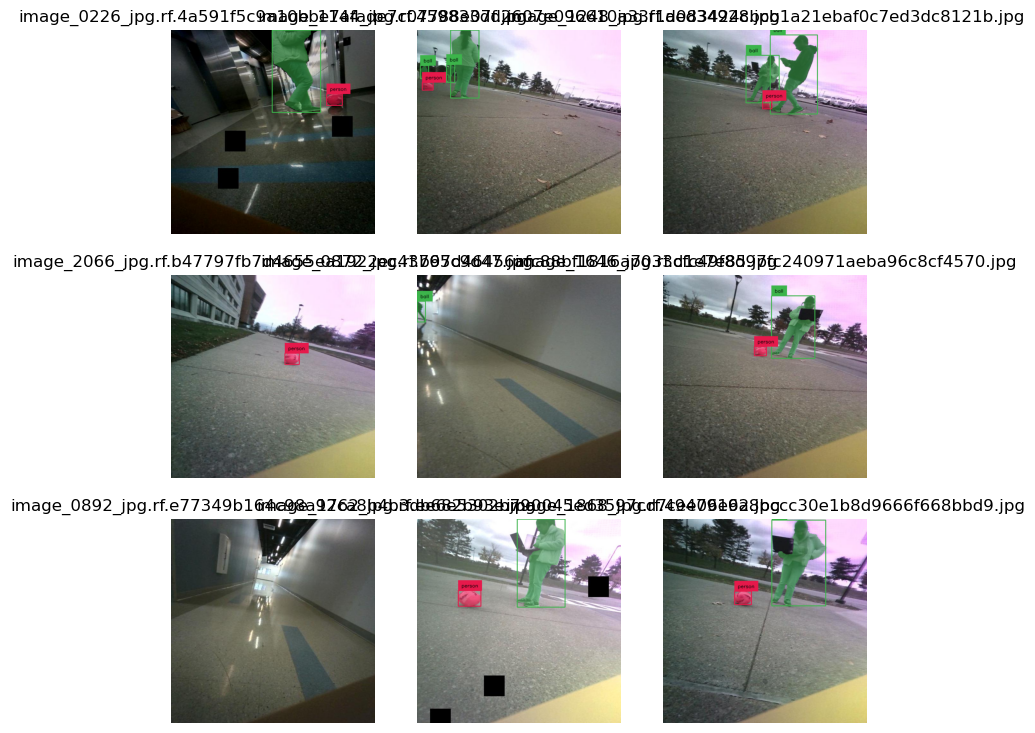

In [9]:
import supervision as sv

SAMPLE_SIZE = 9
SAMPLE_GRID_SIZE = (3, 3)
SAMPLE_PLOT_SIZE = (9, 9)

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE
)

In [10]:
from autodistill_yolov8 import YOLOv8
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
target_model = YOLOv8("yolov8n.pt")
target_model.train(DATA_YAML_PATH, device='cuda:0', epochs=100)

New https://pypi.org/project/ultralytics/8.0.208 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10001MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../../assets/datasets/supervised_trail_run_2//data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=F

train: New cache created: /home/yubie/work/yubie/assets/datasets/supervised_trail_run_2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3120, len(boxes) = 3126. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Scanning /home/yubie/work/yubie/assets/datasets/supervised_trail_run_2/vali
val: WARNING ⚠️ /home/yubie/work/yubie/assets/datasets/supervised_trail_run_2/valid/images/image_0036_jpg.rf.7032015a3ce28c151b6aea400323af0b.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/yubie/work/yubie/assets/datasets/supervised_trail_run_2/valid/images/image_0550_jpg.rf.86275ada2ecd18371634d388fe6e950c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/yubie/work/yubie/assets/datasets/supervised_trail_run_2/valid/images/image_0794_jpg.rf.6778dca8700b1415c0e1d22e6209e5f2.jpg: 1 duplicate labels removed
val: WARNING ⚠️ 

Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      2.14G     0.8309      2.011       1.04          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.962      0.816      0.894      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/100      2.14G     0.7572      1.054       1.01          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.964       0.89      0.936      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/100      2.14G     0.8259      1.045       1.03          0        640: 1
                 Class     Images  Instances     

     50/100      2.14G     0.4947     0.4063     0.9144          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.953      0.938      0.962      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/100      2.14G     0.4904      0.404     0.9038          1        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.955      0.929      0.963      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     52/100      2.14G      0.477     0.3958     0.8975          3        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.957      0.924      0.967      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/10

     75/100      2.14G      0.403      0.326     0.8748          2        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.966      0.933      0.965      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     76/100      2.14G     0.4075     0.3278      0.877          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.967      0.928      0.963      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     77/100      2.13G     0.3994     0.3296     0.8722          1        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.964      0.933      0.963      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     78/10

    100/100      2.14G     0.3421     0.2717     0.8548          1        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315       0.96      0.934      0.964      0.908

100 epochs completed in 0.291 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.81 🚀 Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10001MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        213        315      0.966       0.93      0.967      0.911
                person        213        122      0.979      0.959      0.978      0.944
                  ball        213        193      0.952      0.902      0.955      0.878
Spee

In [20]:
target_model.predict('/home/yubie/work/yubie/assets/video/trail_run_2_left.mp4')



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 12.5ms
video 1/1 (2/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 6.7ms
video 1/1 (3/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 7.4ms
video 1/1 (4/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 6.1ms
video 1/1 (5/1067) /ho

video 1/1 (75/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.6ms
video 1/1 (76/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (77/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.6ms
video 1/1 (78/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 5.5ms
video 1/1 (79/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.7ms
video 1/1 (80/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.9ms
video 1/1 (81/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.6ms
video 1/1 (82/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.6ms
video 1/1 (83/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.6ms
video 1/1 (84/1067) /home/yubie/work/yubie/assets/video/trail_run_2_le

video 1/1 (151/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (152/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.7ms
video 1/1 (153/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.7ms
video 1/1 (154/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.7ms
video 1/1 (155/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.7ms
video 1/1 (156/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (157/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (158/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.6ms
video 1/1 (159/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.6ms
video 1/1 (160/1067) 

video 1/1 (228/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (229/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.9ms
video 1/1 (230/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.7ms
video 1/1 (231/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 5.1ms
video 1/1 (232/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.8ms
video 1/1 (233/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 5.0ms
video 1/1 (234/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.7ms
video 1/1 (235/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.7ms
video 1/1 (236/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.7ms
video 1/1 (237/1067) /home/yubie/work/yubie/assets/video/trail_run

video 1/1 (305/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 5.1ms
video 1/1 (306/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.9ms
video 1/1 (307/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 5.0ms
video 1/1 (308/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (309/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 5.0ms
video 1/1 (310/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (311/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.9ms
video 1/1 (312/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.9ms
video 1/1 (313/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.9ms
video 1/1 (314/1067) /home/yubie/work/yubie/assets/video/trail_r

video 1/1 (381/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.9ms
video 1/1 (382/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 5.1ms
video 1/1 (383/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.9ms
video 1/1 (384/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 5.0ms
video 1/1 (385/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.9ms
video 1/1 (386/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 5.2ms
video 1/1 (387/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.9ms
video 1/1 (388/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 5.0ms
video 1/1 (389/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 

video 1/1 (458/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (459/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (460/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (461/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (462/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.8ms
video 1/1 (463/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (464/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (465/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (466/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.0ms
video 1/

video 1/1 (535/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (536/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (537/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.8ms
video 1/1 (538/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (539/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.8ms
video 1/1 (540/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.9ms
video 1/1 (541/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (542/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.9ms
video 1/1 (543/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.8ms
video 1/1 (544/1067) /home/y

video 1/1 (611/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.7ms
video 1/1 (612/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.1ms
video 1/1 (613/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (614/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 4.7ms
video 1/1 (615/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (616/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 4.7ms
video 1/1 (617/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 (no detections), 5.0ms
video 1/1 (618/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.8ms
video 1/1 (619/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.9ms
video 1/1 (620/1067) /home/yubie

video 1/1 (686/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (687/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (688/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (689/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (690/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.5ms
video 1/1 (691/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.5ms
video 1/1 (692/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.1ms
video 1/1 (693/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.9ms
video 1/1 (694/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.7ms
v

video 1/1 (764/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.8ms
video 1/1 (765/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (766/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (767/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (768/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.8ms
video 1/1 (769/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (770/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (771/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (772/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (773/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ba

video 1/1 (843/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.6ms
video 1/1 (844/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.5ms
video 1/1 (845/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.5ms
video 1/1 (846/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.5ms
video 1/1 (847/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.9ms
video 1/1 (848/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.8ms
video 1/1 (849/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (850/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.0ms
video 1/1 (851/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.

video 1/1 (919/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (920/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.2ms
video 1/1 (921/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (922/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.2ms
video 1/1 (923/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.7ms
video 1/1 (924/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.0ms
video 1/1 (925/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 4.8ms
video 1/1 (926/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 2 balls, 5.4ms
video 1/1 (927/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms

video 1/1 (994/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (995/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (996/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.0ms
video 1/1 (997/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.6ms
video 1/1 (998/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 5.1ms
video 1/1 (999/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (1000/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 ball, 4.7ms
video 1/1 (1001/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 5.3ms
video 1/1 (1002/1067) /home/yubie/work/yubie/assets/video/trail_run_2_left.mp4: 640x480 1 person, 1 ball, 4.8ms
video 1/1 (1003/1067) /home/

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'person', 1: 'ball'}
 orig_img: array([[[ 35,  39,  34],
         [ 35,  39,  34],
         [ 35,  39,  34],
         ...,
         [165, 153, 139],
         [165, 153, 139],
         [165, 153, 139]],
 
        [[ 35,  39,  34],
         [ 35,  39,  34],
         [ 35,  39,  34],
         ...,
         [165, 153, 139],
         [165, 153, 139],
         [165, 153, 139]],
 
        [[ 35,  39,  34],
         [ 35,  39,  34],
         [ 35,  39,  34],
         ...,
         [165, 153, 139],
         [165, 153, 139],
         [165, 153, 139]],
 
        ...,
 
        [[ 42,  52,  51],
         [ 32,  42,  41],
         [ 24,  34,  33],
         ...,
         [ 26,  38,  48],
         [ 26,  38,  48],
         [ 26,  38,  48]],
 
        [[ 37,  47,  46],
         [ 24,  34,  33],
         [ 16,  26,  25],
     